Parser took: 320 ms.
Parser took: 361 ms.
Parser took: 327 ms.


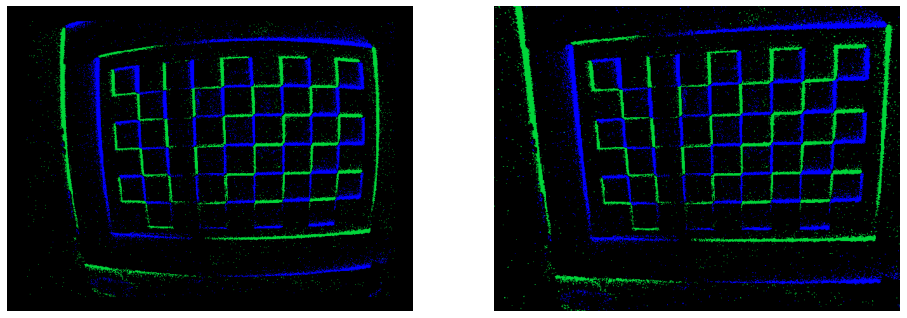

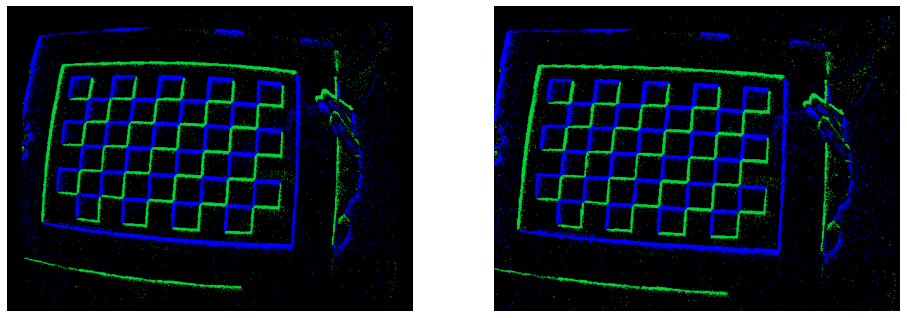

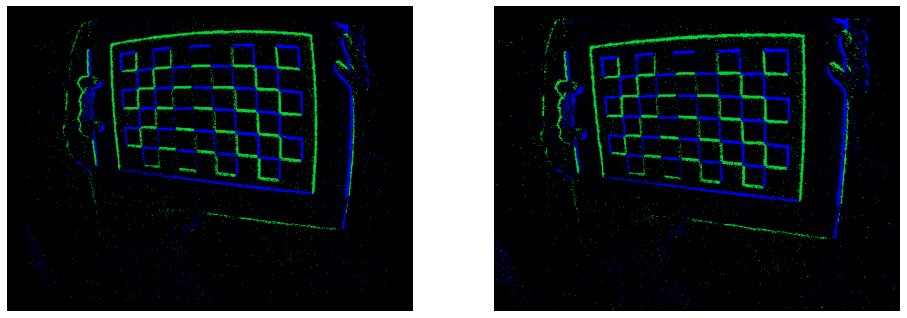

In [12]:

%matplotlib inline

import xml.etree.ElementTree as ET
import re
import numpy as np
import cv2 as cv
import glob
import time
import matplotlib.image as mpimg
from numpy import genfromtxt
import matplotlib.pyplot as plt

'''
Distortion maps are loaded from *.csv files
Undistortion procedure without 'cv' is performed
Results (undistorted images) are plotted
'''
 
def undistort_pt_by_pt(array, mapx, mapy):
    
    x = array.shape[1]
    y = array.shape[0]
        
    undistorted = np.zeros(array.shape, dtype=int)
    
    for i in range(x): #640
        for j in range(y): #480            
            old_x = int(mapx[j, i]) # WARNING: might be [j, i] ...
            old_y = int(mapy[j, i]) # WARNING: might be [j, i] ...
            if ((old_x>=0) and (old_x<x)) and ((old_y>=0) and (old_y<y)):
                undistorted[j, i, :] = distorted[old_y, old_x, :]
    
    return undistorted

def plot_both(distorted, undistorted):
    
    fig, axs = plt.subplots(1,2, figsize=(16,8))
    axs[0].axis('off')
    axs[1].axis('off')
    axs[0].imshow(distorted)
    axs[1].imshow(undistorted)  

if __name__ == "__main__":
    
    
    for i in range(3):
        
        # Which camera?
        camera_id = i+1

        # Which image?
        distorted = cv.imread("distorted_" + str(camera_id) + ".png")

        mapx = genfromtxt("mapx_cam" + str(camera_id) + ".csv", delimiter=',')
        mapy = genfromtxt("mapy_cam" + str(camera_id) + ".csv", delimiter=',')
        
        
        start = time.time()
        
        # Get undistorted image (using distortion maps)
        undistorted = undistort_pt_by_pt(distorted, mapx, mapy)
        stop = time.time()

        elapsed = stop - start
        print("Parser took: " + str(int(1000*elapsed)) + " ms.")

        # Plot distorted and undistorted images
        plot_both(distorted, undistorted)

